In [1]:
import pandas as pd


# Loading datasets
higher_ed_df = pd.read_csv('dataset/subset_higher_ed_ednum.csv')
some_college_df = pd.read_csv('dataset/subset_some_college_ednum.csv')
less_than_hs_df = pd.read_csv('dataset/subset_less_than_hs_ednum.csv')

In [2]:
from sklearn.preprocessing import LabelEncoder


# Dropping 'fnlgwt' and 'Education' features from all datasets as they are not useful or duplicated
higher_ed_df = higher_ed_df.drop(['fnlgwt', 'Education'], axis=1)
some_college_df = some_college_df.drop(['fnlgwt', 'Education'], axis=1)
less_than_hs_df = less_than_hs_df.drop(['fnlgwt', 'Education'], axis=1)

# Encoding categorical features in all datasets
def encode_features(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    return df, label_encoders

higher_ed_df_encoded, higher_ed_encoders = encode_features(higher_ed_df.copy())
some_college_df_encoded, some_college_encoders = encode_features(some_college_df.copy())
less_than_hs_df_encoded, less_than_hs_encoders = encode_features(less_than_hs_df.copy())

(higher_ed_df_encoded.head(), some_college_df_encoded.head(), less_than_hs_df_encoded.head())

(   Age  Workclass  EdNum  MaritalStatus  Occupation  Relationship  Race  Sex  \
 0   39          5     13              4           0             1     4    1   
 1   50          4     13              2           3             0     4    1   
 2   28          2     13              2           9             5     2    0   
 3   37          2     14              2           3             5     4    0   
 4   31          2     14              4           9             1     4    0   
 
    CapitalGain  CapitalLoss  HoursPerWeek  Country  Income  
 0         2174            0            40       37       0  
 1            0            0            13       37       0  
 2            0            0            40        4       0  
 3            0            0            40       37       0  
 4        14084            0            50       37       1  ,
    Age  Workclass  EdNum  MaritalStatus  Occupation  Relationship  Race  Sex  \
 0   38          2      9              0           5      

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt


# Defining the input features and target variable for each subset
X_higher_ed = higher_ed_df_encoded.drop('Income', axis=1)
y_higher_ed = higher_ed_df_encoded['Income']

X_some_college = some_college_df_encoded.drop('Income', axis=1)
y_some_college = some_college_df_encoded['Income']

X_less_than_hs = less_than_hs_df_encoded.drop('Income', axis=1)
y_less_than_hs = less_than_hs_df_encoded['Income']

In [4]:
from sklearn.model_selection import train_test_split

X_higher_ed_train, X_higher_ed_test, y_higher_ed_train, y_higher_ed_test = train_test_split(X_higher_ed, y_higher_ed, test_size=0.1, random_state=42)

X_some_college_train, X_some_college_test, y_some_college_train, y_some_college_test = train_test_split(X_some_college, y_some_college, test_size=0.1, random_state=42)

X_less_than_hs_train, X_less_than_hs_test, y_less_than_hs_train, y_less_than_hs_test = train_test_split(X_less_than_hs, y_less_than_hs, test_size=0.1, random_state=42)

1. K-Nearest Neighbors (KNN)

Function Call:
~~~python
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
~~~
Hyperparameter: n_neighbors

Values for Testing: 1, 3, 5, 7, 9

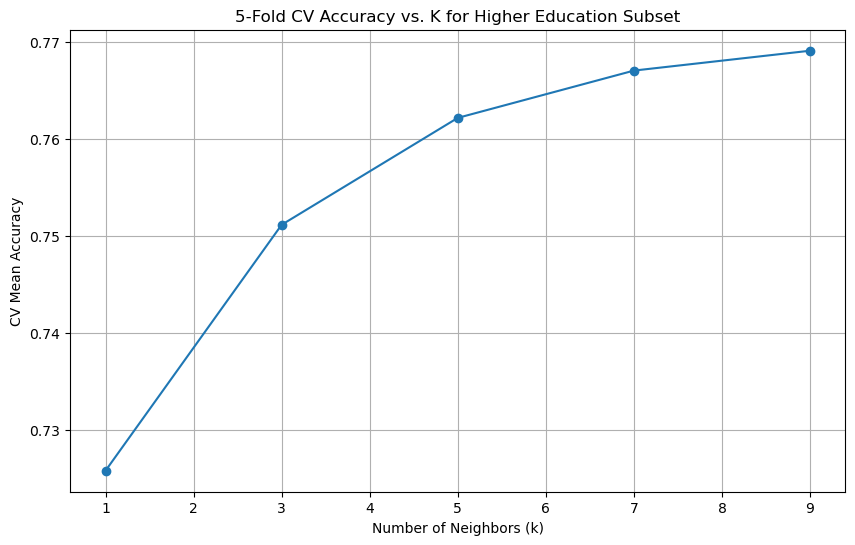

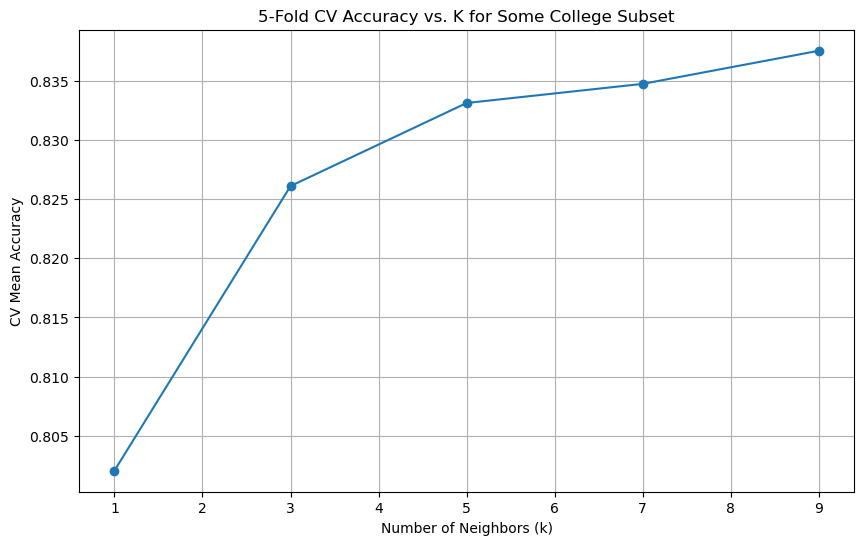

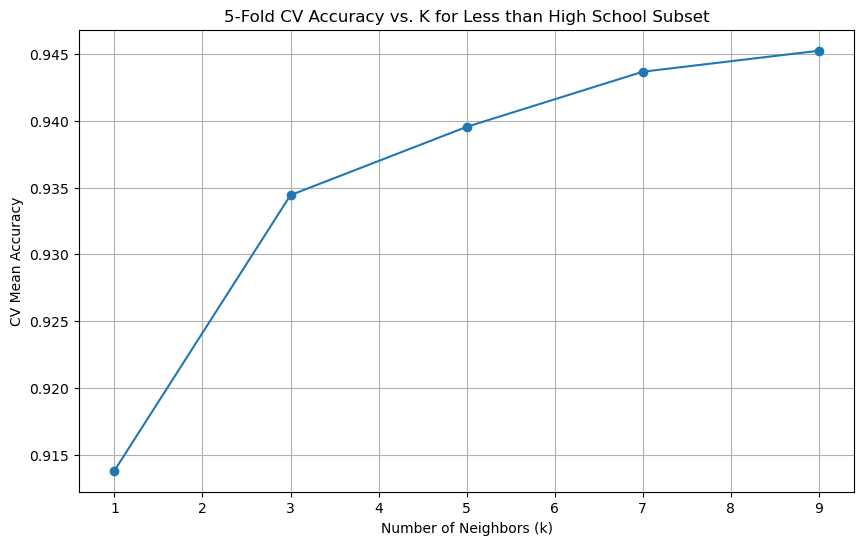

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Setting up K values for tuning
k_values = [1, 3, 5, 7, 9]

# Function to perform KNN tuning and plotting
def tune_knn(X, y, k_values, title):
    X = X.copy()
    y = y.copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    mean_cv_scores = []
    for k in k_values:
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn_clf, X, y, cv=5)
        mean_cv_scores.append(np.mean(cv_scores))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, mean_cv_scores, marker='o')
    plt.title(f'5-Fold CV Accuracy vs. K for {title}')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.show()

tune_knn(X_higher_ed_train, y_higher_ed_train, k_values, "Higher Education Subset")
tune_knn(X_some_college_train, y_some_college_train, k_values, "Some College Subset")
tune_knn(X_less_than_hs_train, y_less_than_hs_train, k_values, "Less than High School Subset")


2. Artificial Neural Network (ANN)

Function Call:
~~~python
from sklearn.neural_network import MLPClassifier
ann_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu')
~~~
Hyperparameter: hidden_layer_sizes (for the number of neurons in the hidden layers)

Values for Testing: [(50,), (100,), (100,50), (100,100), (50,50,50)]

Size of hidden layer:  (50,)
Size of hidden layer:  (100,)
Size of hidden layer:  (100, 50)
Size of hidden layer:  (100, 100)
Size of hidden layer:  (50, 50, 50)


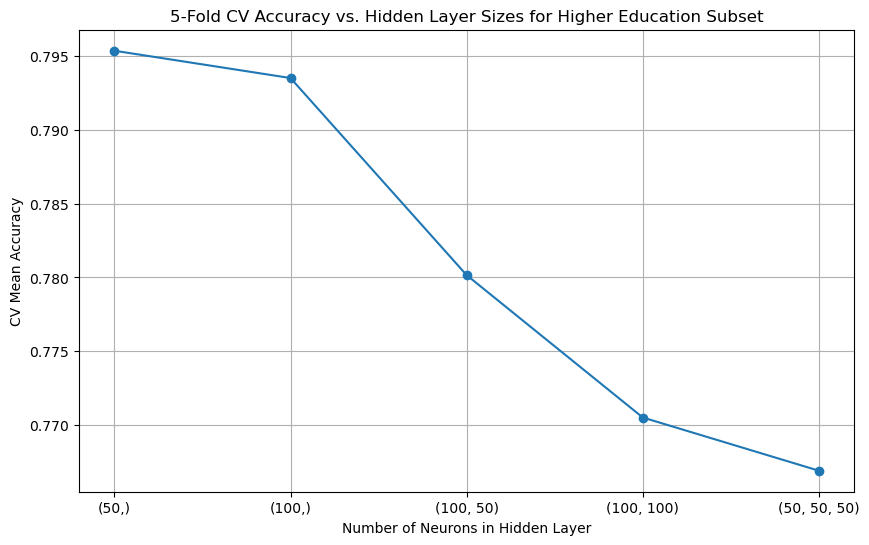

Size of hidden layer:  (50,)
Size of hidden layer:  (100,)
Size of hidden layer:  (100, 50)
Size of hidden layer:  (100, 100)
Size of hidden layer:  (50, 50, 50)


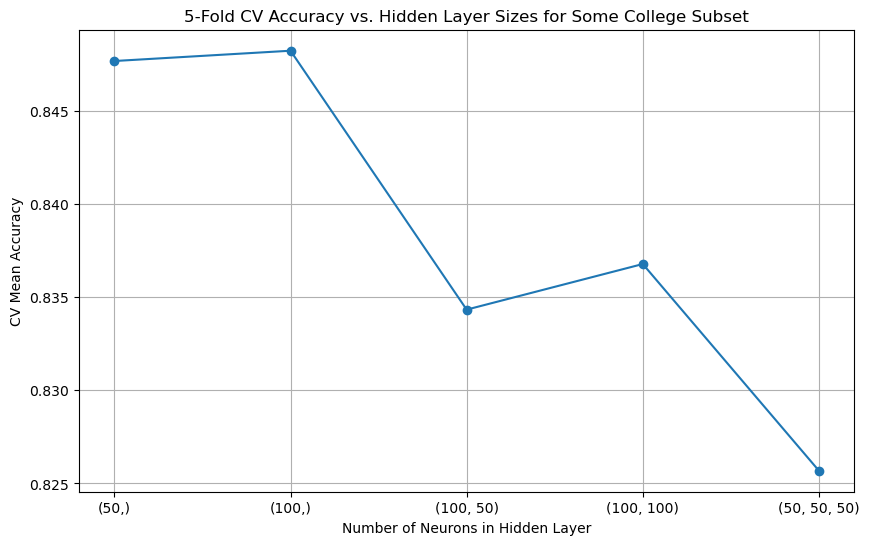

Size of hidden layer:  (50,)
Size of hidden layer:  (100,)
Size of hidden layer:  (100, 50)
Size of hidden layer:  (100, 100)
Size of hidden layer:  (50, 50, 50)


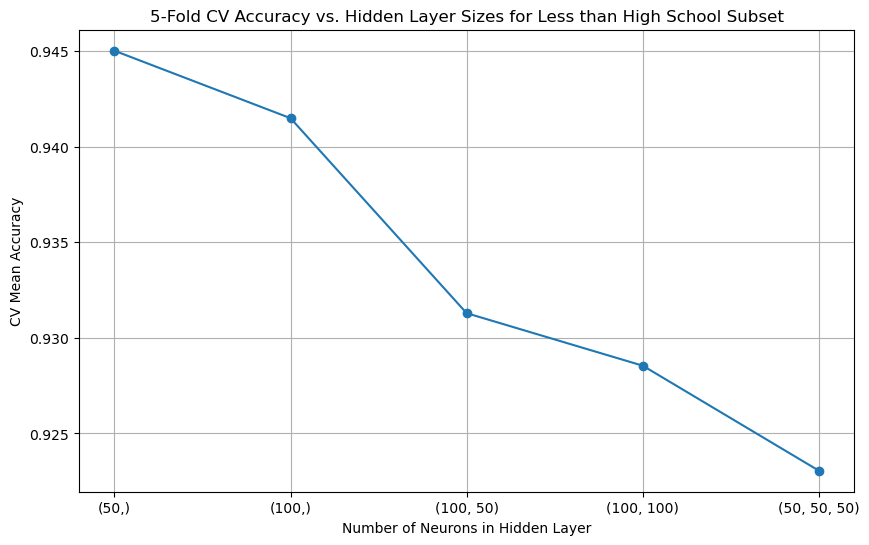

In [6]:
from sklearn.neural_network import MLPClassifier


# Configurations for the hidden layer sizes to test
hidden_layer_sizes = [(50,), (100,), (100,50), (100,100), (50,50,50)]

def tune_ann(X, y, hidden_layer_sizes, title):
    X = X.copy()
    y = y.copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    mean_cv_scores_ann = []
    for size in hidden_layer_sizes:
        print('Size of hidden layer: ', size)
        ann_clf = MLPClassifier(hidden_layer_sizes=size, activation='relu', max_iter=1000)
        cv_scores = cross_val_score(ann_clf, X, y, cv=5)
        mean_cv_scores_ann.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10, 6))
    plt.plot([str(size) for size in hidden_layer_sizes], mean_cv_scores_ann, marker='o')
    plt.title(f'5-Fold CV Accuracy vs. Hidden Layer Sizes for {title}')
    plt.xlabel('Number of Neurons in Hidden Layer')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.show()

tune_ann(X_higher_ed_train, y_higher_ed_train, hidden_layer_sizes, "Higher Education Subset")
tune_ann(X_some_college_train, y_some_college_train, hidden_layer_sizes, "Some College Subset")
tune_ann(X_less_than_hs_train, y_less_than_hs_train, hidden_layer_sizes, "Less than High School Subset")

3. Decision Tree

Function Call:

~~~python
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=5)
~~~
Hyperparameter: max_depth

Values for Testing: 3, 5, 7, 9, None (no limit)

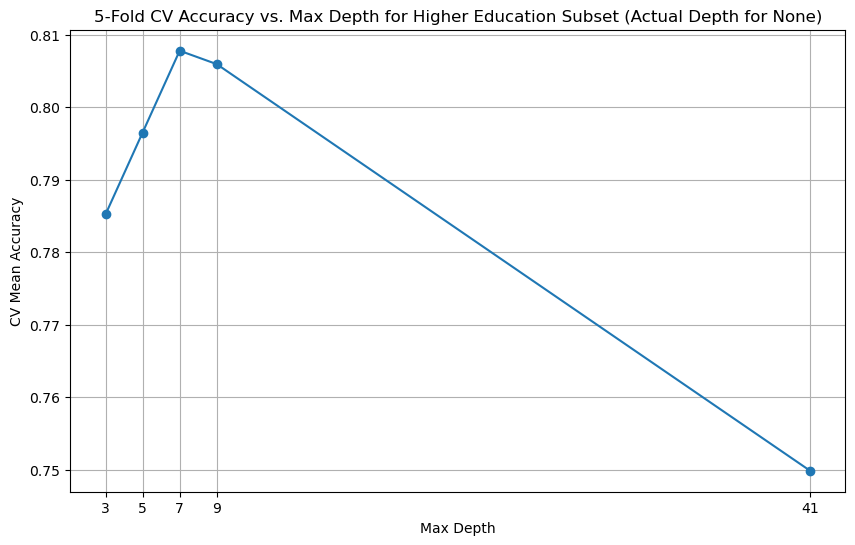

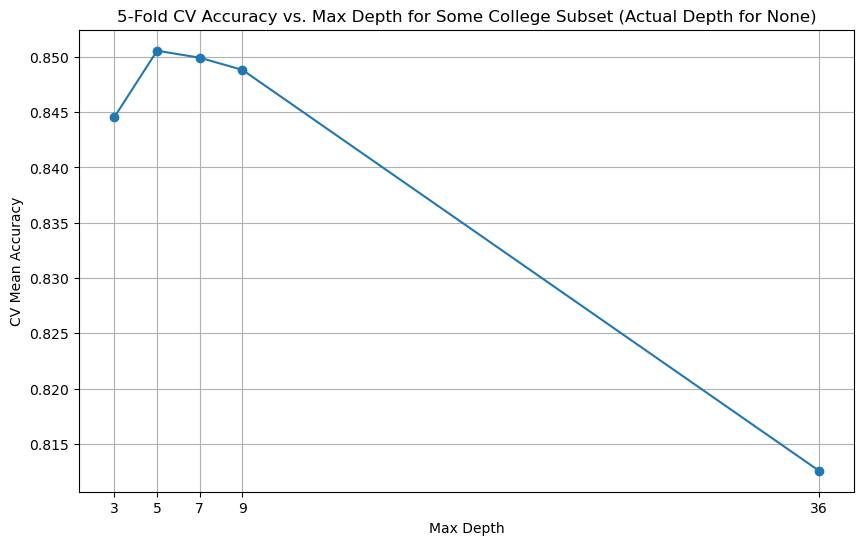

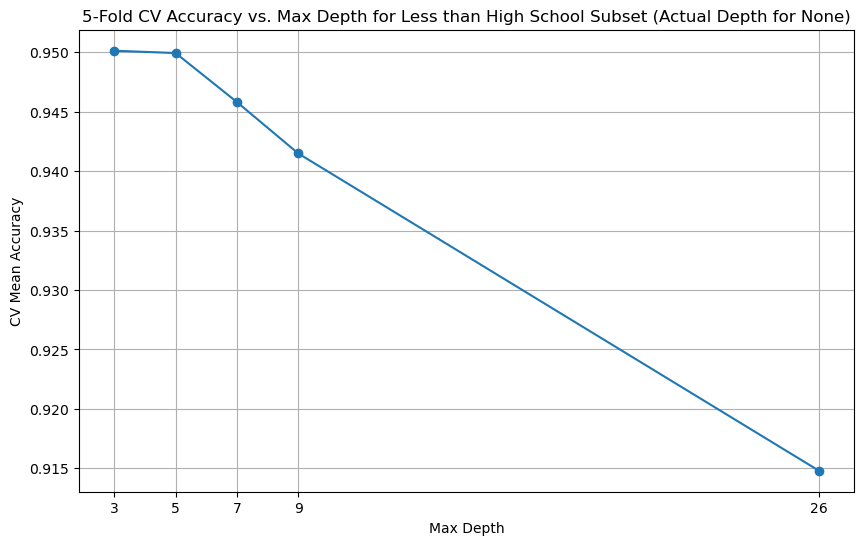

In [7]:
from sklearn.tree import DecisionTreeClassifier

    
def tune_decision_tree(X, y, max_depth_values, title):
    X = X.copy()
    y = y.copy()
    mean_cv_scores_dt = []
    depths_for_plot = max_depth_values.copy()  # Copy the list to avoid modifying the original
    
    for depth in max_depth_values:
        if depth is None:
            # Fit the tree without depth restriction
            dt_clf = DecisionTreeClassifier(max_depth=None)
            dt_clf.fit(X, y)  # Fit the model to find out the actual depth
            actual_depth = dt_clf.get_depth()  # Get the actual depth of the tree
            depths_for_plot[-1] = actual_depth  # Replace None with actual depth for plotting
        # else:
        dt_clf = DecisionTreeClassifier(max_depth=depth)
        
        cv_scores = cross_val_score(dt_clf, X, y, cv=5)
        mean_cv_scores_dt.append(np.mean(cv_scores))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(depths_for_plot, mean_cv_scores_dt, marker='o')
    plt.title(f'5-Fold CV Accuracy vs. Max Depth for {title} (Actual Depth for None)')
    plt.xlabel('Max Depth')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.xticks(depths_for_plot)
    plt.show()


# Define the list of max_depth values to test
max_depth_values = [3, 5, 7, 9, None]

tune_decision_tree(X_higher_ed_train, y_higher_ed_train, max_depth_values, "Higher Education Subset")
tune_decision_tree(X_some_college_train, y_some_college_train, max_depth_values, "Some College Subset")
tune_decision_tree(X_less_than_hs_train, y_less_than_hs_train, max_depth_values, "Less than High School Subset")

4. Random Forest

Function Call:

~~~python
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
~~~
Hyperparameter: n_estimators (number of trees)

Values for Testing: 10, 50, 100, 150, 200

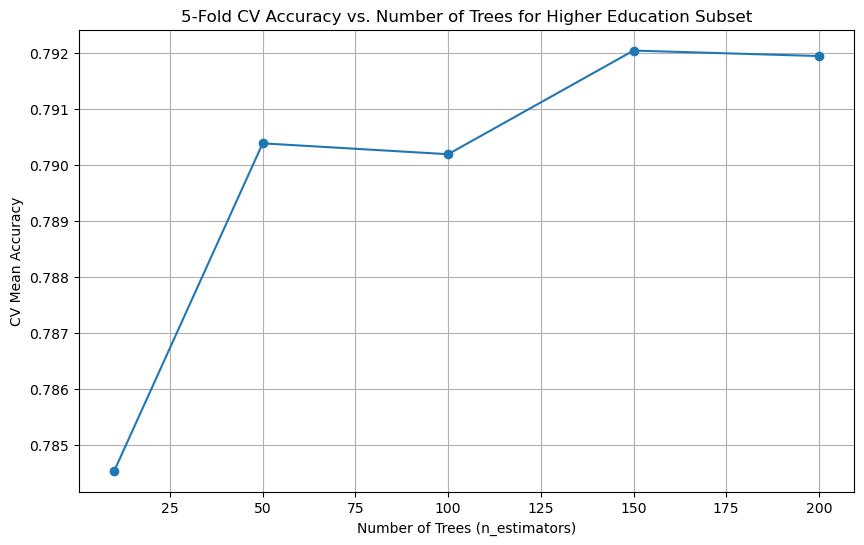

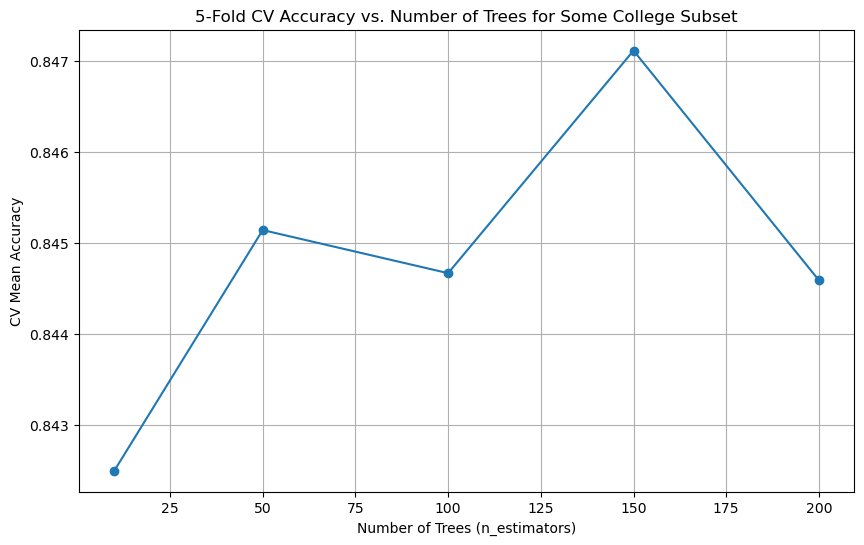

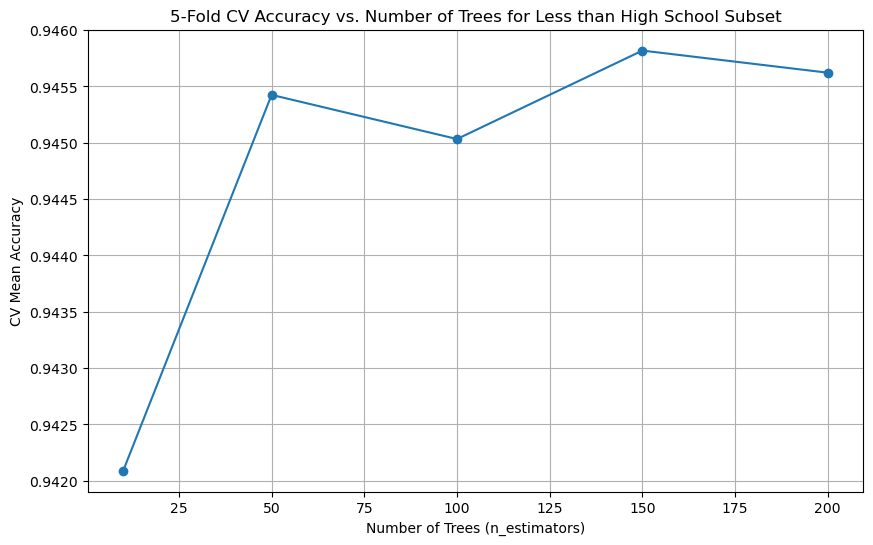

In [8]:
from sklearn.ensemble import RandomForestClassifier


def tune_random_forest(X, y, n_estimators_values, title):
    X = X.copy()
    y = y.copy()
    mean_cv_scores_rf = []
    
    for n_estimators in n_estimators_values:
        rf_clf = RandomForestClassifier(n_estimators=n_estimators)
        cv_scores = cross_val_score(rf_clf, X, y, cv=5)
        mean_cv_scores_rf.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_values, mean_cv_scores_rf, marker='o')
    plt.title(f'5-Fold CV Accuracy vs. Number of Trees for {title}')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.show()

n_estimators_values = [10, 50, 100, 150, 200]

tune_random_forest(X_higher_ed_train, y_higher_ed_train, n_estimators_values, "Higher Education Subset")
tune_random_forest(X_some_college_train, y_some_college_train, n_estimators_values, "Some College Subset")
tune_random_forest(X_less_than_hs_train, y_less_than_hs_train, n_estimators_values, "Less than High School Subset")

5. Naïve Bayes Classifier

Function Call:
~~~python
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB(var_smoothing=1e-9)
~~~
Hyperparameter: var_smoothing (portion of the largest variance of all features added to variances for calculation stability)

Values for Testing: 1e-9, 1e-8, 1e-7, 1e-6, 1e-5

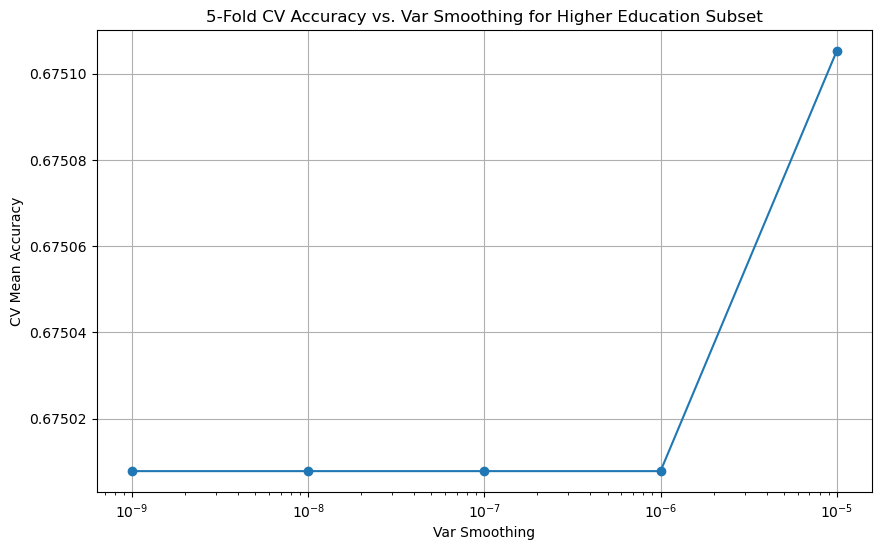

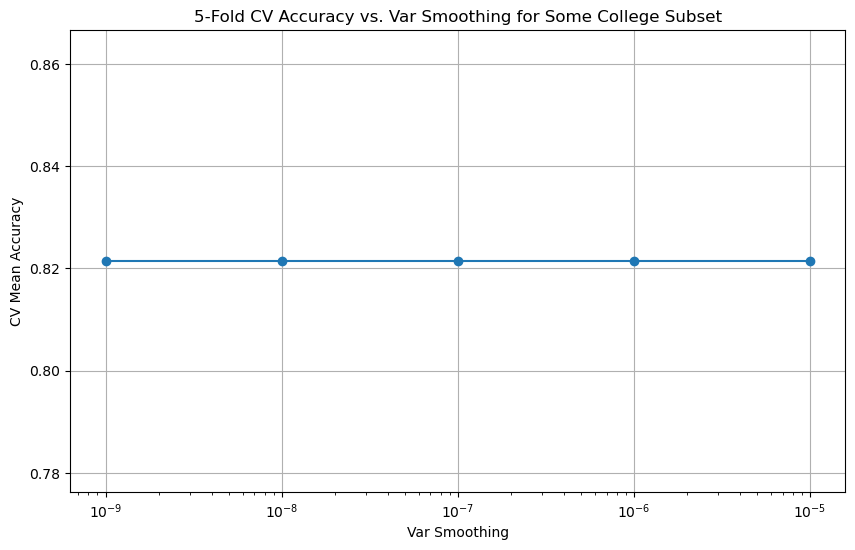

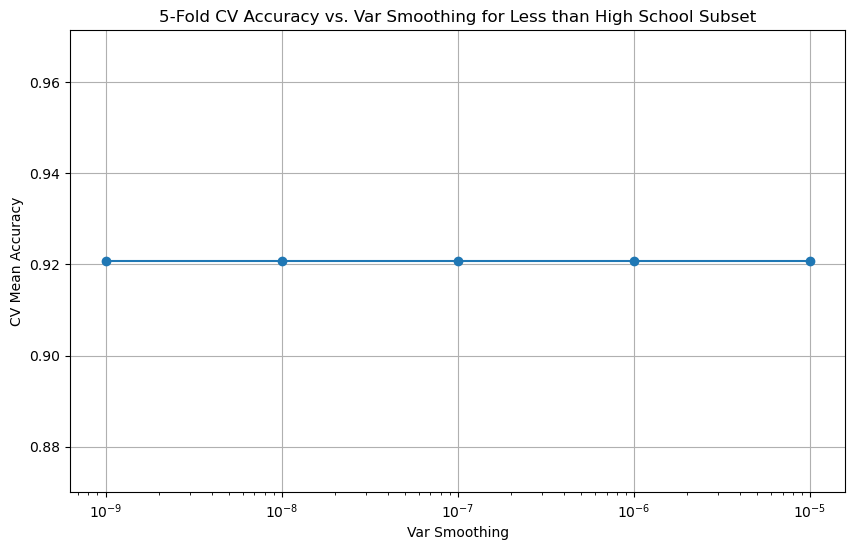

In [9]:
from sklearn.naive_bayes import GaussianNB


def tune_naive_bayes(X, y, var_smoothing_values, title):
    X = X.copy()
    y = y.copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    mean_cv_scores_nb = []
    
    for var_smoothing in var_smoothing_values:
        nb_clf = GaussianNB(var_smoothing=var_smoothing)
        cv_scores = cross_val_score(nb_clf, X, y, cv=5)
        mean_cv_scores_nb.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10, 6))
    plt.semilogx(var_smoothing_values, mean_cv_scores_nb, marker='o', base=10)
    plt.title(f'5-Fold CV Accuracy vs. Var Smoothing for {title}')
    plt.xlabel('Var Smoothing')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.show()

var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

tune_naive_bayes(X_higher_ed_train, y_higher_ed_train, var_smoothing_values, "Higher Education Subset")
tune_naive_bayes(X_some_college_train, y_some_college_train, var_smoothing_values, "Some College Subset")
tune_naive_bayes(X_less_than_hs_train, y_less_than_hs_train, var_smoothing_values, "Less than High School Subset")

6. Support Vector Machine (SVM)

Function Call:
~~~python
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')
~~~
Hyperparameters: kernel

Values for Testing: ['rbf', 'sigmoid', 'linear', 'poly']

Processing: rbf
Processing: sigmoid
Processing: linear
Processing: poly


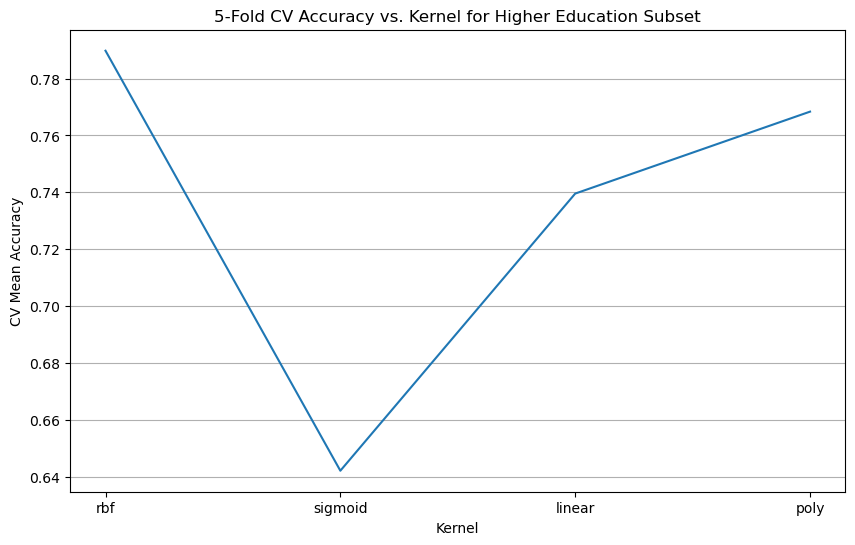

Processing: rbf
Processing: sigmoid
Processing: linear
Processing: poly


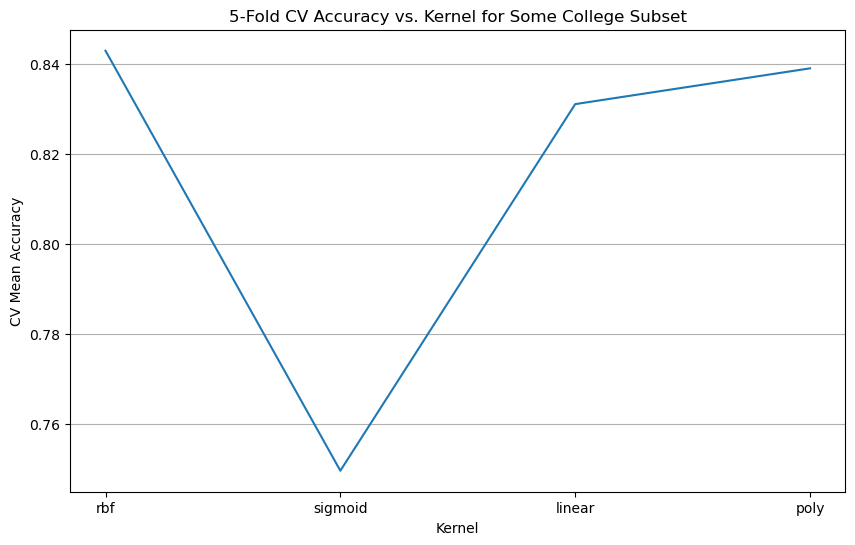

Processing: rbf
Processing: sigmoid
Processing: linear
Processing: poly


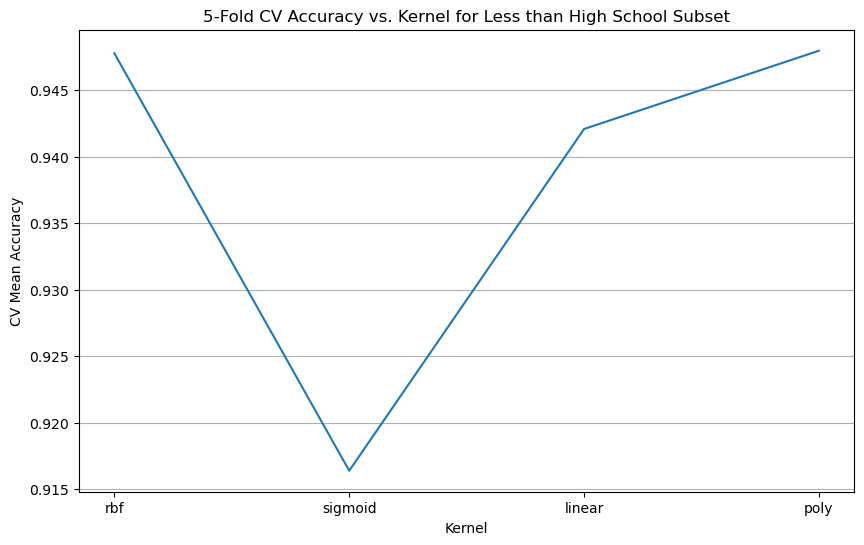

In [10]:
from sklearn.svm import SVC


def tune_svm(X, y, kernels, title):
    X = X.copy()
    y = y.copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    mean_cv_scores_svm = []

    for kernel in kernels:
        print("Processing:", kernel)
        svm_clf = SVC(kernel=kernel)

        cv_scores = cross_val_score(svm_clf, X, y, cv=5)
        mean_cv_scores_svm.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10, 6))
    plt.plot(kernels, mean_cv_scores_svm)
    plt.title(f'5-Fold CV Accuracy vs. Kernel for {title}')
    plt.xlabel('Kernel')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True, axis='y')
    plt.show()

kernels = ['rbf', 'sigmoid', 'linear', 'poly']

tune_svm(X_higher_ed_train, y_higher_ed_train, kernels, "Higher Education Subset")
tune_svm(X_some_college_train, y_some_college_train, kernels, "Some College Subset")
tune_svm(X_less_than_hs_train, y_less_than_hs_train, kernels, "Less than High School Subset")